# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

We're going to use 10% of training images for validation (rule of thumb is around 20% but we don't have too many images to spare :) )

In [16]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split

# Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [17]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)
n_validation = len(X_validation)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print(y_train[3])

Number of training examples = 35288
Number of validation examples = 3921
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
10


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

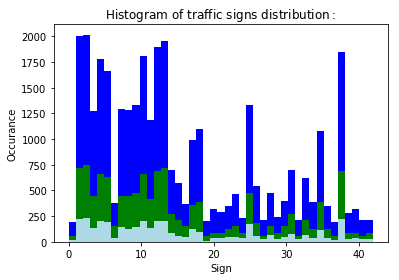

4
38
2
38
12


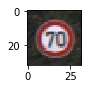

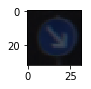

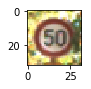

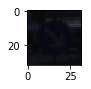

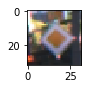

In [102]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
plt.xlabel('Sign')
plt.ylabel('Occurance')
plt.title(r'$\mathrm{Histogram\ of\ traffic\ signs\ distribution:}\ $')
ax.hist(y_train, bins=43, color='blue')
ax.hist(y_test, bins=43, color='green')
ax.hist(y_validation, bins=43, color='lightblue')
plt.show()

for i in range(5):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

It's important to shuffle the data, otherwise ordering of training data can have negative impact on the correctness of model.

In [19]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Split Data into Training, Validation and Testing Sets

As per Step-0 we're taking the provided traning and testing data. For validation we are using randomly selected 10% of the training set.

In [20]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Model Architecture

For the model we'll be using Yan LeCun's LeNet with ReLU activation function:
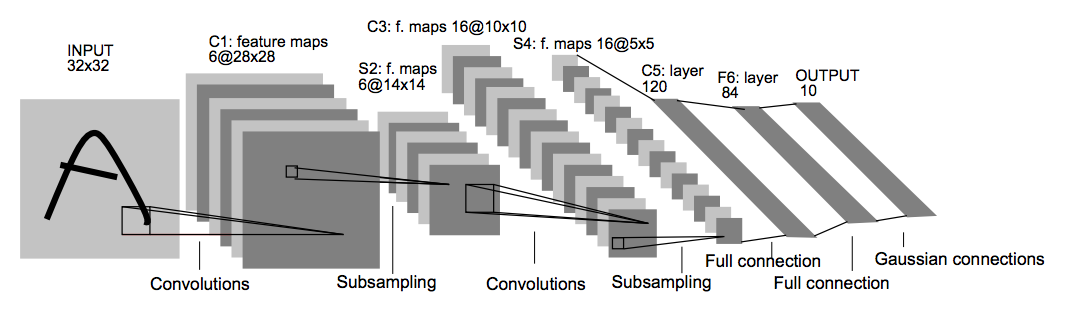

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6 	     			|
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 10x10x16 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16   				|
| Flatten       		| input 5x5x16, outputs 400       				|
| Fully connected		| input 400, outputs 120 						|
| RELU					|												|
| Fully connected		| input 120, outputs 84       					|
| RELU					|												|
| Fully connected		| inputs 84, outputs 43  						|


We're going to use 5 epochs for now since it produces a good balance of time to train and results.
Batch size is guided by how many images can fit in memory at given point and we'll use 128 like we did in LeNet lab.

I've tried a few simpler models before this one, but after reading http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf and going through https://github.com/udacity/CarND-LeNet-Lab it became obvious that this is a great architecture for the model.



In [92]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128


In [93]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,1,1,1], padding='VALID') + conv2_b    
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    conv2 = tf.contrib.layers.flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    conv3_w = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma))
    conv3_b = tf.Variable(tf.zeros(120))
    
    conv3 = tf.matmul(conv2, conv3_w) + conv3_b
    
    # Activation.
    conv3 = tf.nn.relu(conv3)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    conv4_w = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma))
    conv4_b = tf.Variable(tf.zeros(84))
    
    conv4 = tf.matmul(conv3, conv4_w) + conv4_b
    
    
    # Activation.
    conv4 = tf.nn.relu(conv4)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    conv5_w = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma))
    conv5_b = tf.Variable(tf.zeros(43))
    
    logits = tf.matmul(conv4, conv5_w) + conv5_b                
    
    return logits

In [94]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [95]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [96]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [97]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    save_path = saver.save(sess, './lenet')
    print("Model saved %s" % save_path)

Training...

EPOCH 1 ...
Validation Accuracy = 0.727

EPOCH 2 ...
Validation Accuracy = 0.855

EPOCH 3 ...
Validation Accuracy = 0.895

EPOCH 4 ...
Validation Accuracy = 0.919

EPOCH 5 ...
Validation Accuracy = 0.933

EPOCH 6 ...
Validation Accuracy = 0.934

EPOCH 7 ...
Validation Accuracy = 0.940

EPOCH 8 ...
Validation Accuracy = 0.915

EPOCH 9 ...
Validation Accuracy = 0.950

EPOCH 10 ...
Validation Accuracy = 0.946

Model saved ./lenet


In [98]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.879


As we can see from the validation and test accuracy the model does pretty well on both with little signs of over- or under-fitting. I've used 10 Epoch training since it seems to get the maximum tradeoff between speed of training and accuracy

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [99]:
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def loadImages(path):
    # return array of images
    imagesList = listdir(path)
    print(imagesList)
    loadedImages = []
    for i in imagesList:
        img = Image.open(path + i)
        img.thumbnail((32, 32), Image.ANTIALIAS)
        full_image = Image.new('RGB', (32,32), (255,255,255))
        full_image.paste(img, img.getbbox())
        loadedImages.append(np.array(full_image))

    return loadedImages

images = loadImages("./test/")

# for i in images:
#     plt.figure(figsize=(1,1))
#     plt.imshow(i)

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']


### Predict the Sign Type for Each Image

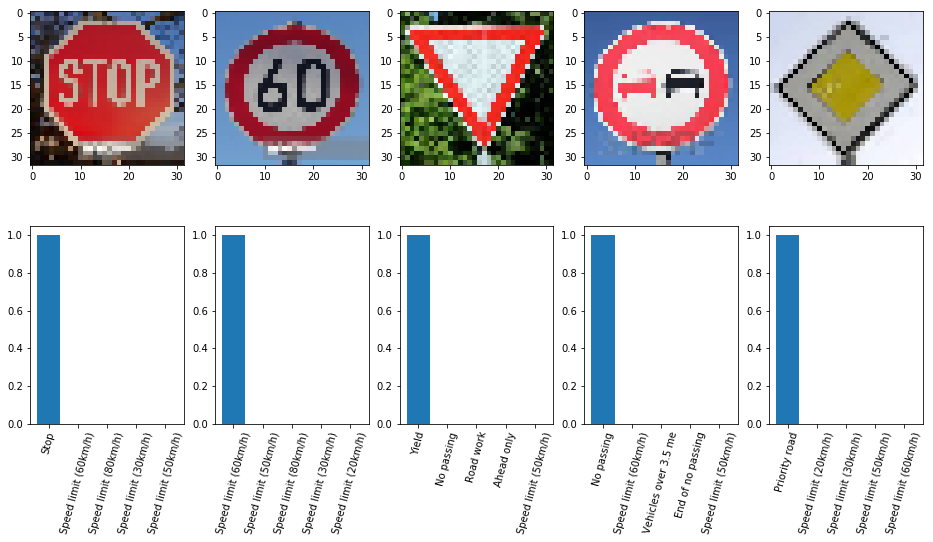

In [100]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

prediction = tf.nn.softmax(logits)
top5 = tf.nn.top_k(prediction, k=5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
#     print(sess.run(prediction, feed_dict={x: images}))
    top5_prediction = sess.run(top5, feed_dict={x: images});
    
import csv
with open('signnames.csv') as f:
    reader = csv.DictReader(f)
    categories = {row['ClassId']:row['SignName'] for row in reader}    
    
fig = plt.figure(figsize=(16,8))
for index in range(0,len(images)):
    fig.add_subplot(2, len(images), index+1)
    plt.imshow(images[index])
    fig.add_subplot(2, len(images), index+1 + len(images))
    y_pos = np.arange(len(top5_prediction.values[index]))
    plt.bar(y_pos,top5_prediction.values[index])
    plt.xticks(y_pos,[categories[str(i)][0:20] for i in top5_prediction.indices[index]], rotation=75)  

The images used for testing are very clear and exactly same size as the training set. As you can see accuracy is 100%. While test accuracy being 85.8%, we got lucky in this case with good images.

I tried it on the bigger images from the internet with little luck, for that to work I'd need to add the processing to increase contrast and reduce the size.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [41]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

print(top5_prediction)

TopKV2(values=array([[  9.99989152e-01,   1.06484167e-05,   1.92479476e-07,
          4.04961709e-09,   1.46371387e-10],
       [  9.83068585e-01,   1.69300586e-02,   1.33153708e-06,
          4.41552128e-09,   1.16274232e-12],
       [  1.00000000e+00,   1.69741267e-32,   2.52394705e-36,
          3.60650078e-37,   4.25603210e-38],
       [  9.98764038e-01,   1.23554852e-03,   4.75111619e-07,
          2.89555295e-08,   2.28198029e-08],
       [  1.00000000e+00,   3.89557840e-19,   3.09203738e-22,
          1.27298409e-22,   8.54425912e-23]], dtype=float32), indices=array([[14,  1,  4, 18, 42],
       [ 3,  2,  5,  1,  0],
       [13, 32, 17, 25, 38],
       [12,  9, 42, 26, 10],
       [12, 14, 32, 35, 25]], dtype=int32))


After finindg a mistake in classification using 5 epocs I've upped the number to 10 and the model now predicts correct signs with 98-100% probability rate and very low rates of wrong suggestions.

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 0.99         			| Stop sign   									| 
| 0.98     				| Speed Limit (60) 								|
| 1.00					| Yield											|
| 0.99	      			| No passing					 				|
| 1.00				    | Priority Road      							|

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 